Read in files from HCPgrad_tidy_version notebook to be used to calculate centroids and dispersion of networks 

In [16]:
import pandas as pd

all_concat = pd.read_csv('/scratch/a/arisvoin/lbassman/spins_gradients/spins_concat_full')
merge_networks = pd.read_csv('/scratch/a/arisvoin/lbassman/spins_gradients/merge_networks')
all_concat_short = pd.read_csv('/scratch/a/arisvoin/lbassman/spins_gradients/spins_concat_shortened')
gsr_all_concat = pd.read_csv('/scratch/a/arisvoin/lbassman/spins_gradients/gsr_spins_concat_full')
gsr_all_concat_short = pd.read_csv('/scratch/a/arisvoin/lbassman/spins_gradients/gsr_spins_concat_shortened')

Using seaborn to plot gradients against each other and create scatterplot, sorted by network

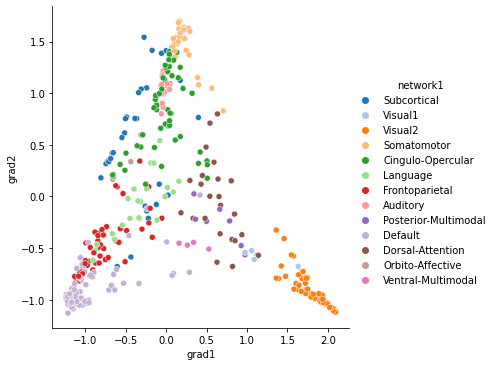

In [48]:
import seaborn as sns

sns.relplot(data = merge_networks, x = "grad1", y = "grad2", hue = 'network1', palette='tab20' #legend=False
               )

Creating a list of each of the subject IDs, networks, sites and tasks of all the spins data. Reading in the list of rest subjects as separate subject list due to 8 missing rest files. 

In [2]:
subject_group = all_concat.groupby(['Subject'])            #grouping_by separates dataframe by column - creates indiv. groups
network_group = merge_networks.groupby(['network1'])
site_group = all_concat.groupby(['Site'])
task_group = all_concat.groupby(['Task'])

list_subjects = list(subject_group.groups.keys())         #groups.keys gets all groupby group names, creates list
list_networks = list(network_group.groups.keys())
list_sites = list(site_group.groups.keys())
list_tasks = list(task_group.groups.keys())

In [3]:
def calc_centroid(file, grouping_by, subject, task, network):
    '''Calculates the centroid of a network by subject and by task for given parameters in a file
    Takes first three gradients only
    Uses pandas groupby function to separate by given group, column in the file
    Takes one object in the given group each to specify which element in the group
    Calculates mean for each gradient and outputs as a 3D coordinate point.
    
    Parameters
    ----------
    file: str or path
        csv containing all information
    grouping_by: str 
        column in file 
    subject: str
    task: str
    network: str
        Specify which network, subject, and task pandas will get from the group


    Returns
    -------
    x_mean, y_mean, z_mean
        A three point coordinate, representing the centroid of the network (by subject and task)
    '''
    grouped_by = file.groupby(grouping_by)
    #create group, and then get groups based on parameters
    group_name = grouped_by.get_group((subject, task, network))
    #calculate mean of each gradient
    x_mean = group_name['grad1'].mean()
    y_mean = group_name['grad2'].mean()
    z_mean = group_name['grad3'].mean()
    return x_mean, y_mean, z_mean

                         

Creating dispersion function to determine the average dispersion around the centroid for each network given specified subject id and task.

In [4]:
import numpy as np

def calc_dispersion(file, grouping_by, subject, task, network):
    '''Calculates the dispersion around a centroid of a network by subject and by task for given parameters in a file
    Takes first three gradients only
    Uses pandas groupby function to separate by given group, column in the file
    Takes one object in the given group each to specify which element in the group
    Calculates dispersion for each gradient and outputs value. 
    
    Parameters
    ----------
    file: str or path
        csv containing all information
    grouping_by: str 
        column in file 
    subject: str
    task: str
    network: str
        Specify which network, subject, etc pandas will get from the group


    Returns
    -------
    dispersion
        A single value, representing the average dispersion of the network (by subject and task)
    '''
    grouped_by = file.groupby(grouping_by)
    group_name = grouped_by.get_group((subject, task, network))
    #calculate dispersion by using euclidean distance formula and standard deviation of each point of each gradient
    dispersion = np.sqrt((group_name['grad1'].std()**2)+(group_name['grad2'].std()**2)+(group_name['grad3'].std()**2))
    return dispersion

Using for loop to calculate the dispersion of every network for every subject and each task. EA and RS are calculated separately and will be concatenated after calculation. Each list of dispersion is then converted to a dataframe

In [18]:
import itertools
dispersion_EA = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(all_concat, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    dispersion_EA.append(dispersion)
    
dispersion_RS = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(all_concat, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    dispersion_RS.append(dispersion)
    
dispersion_EA_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    dispersion_EA_short.append(dispersion)
    
dispersion_RS_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    dispersion_RS_short.append(dispersion)
    
dispersion_EAgsr = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(gsr_all_concat, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    dispersion_EAgsr.append(dispersion)
    
dispersion_RSgsr = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(gsr_all_concat, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    dispersion_RSgsr.append(dispersion)
    
dispersion_EAgsr_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(gsr_all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    dispersion_EAgsr_short.append(dispersion)
    
dispersion_RSgsr_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    dispersion =  calc_dispersion(gsr_all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    dispersion_RSgsr_short.append(dispersion)

In [19]:
EA_dispersion_df = pd.DataFrame(data = dispersion_EA,
                               columns = ['Dispersion'])

RS_dispersion_df = pd.DataFrame(data = dispersion_RS,
                               columns = ['Dispersion'])

EA_dispersion_short_df = pd.DataFrame(data = dispersion_EA_short,
                               columns = ['Dispersion'])

RS_dispersion_short_df = pd.DataFrame(data = dispersion_RS_short,
                               columns = ['Dispersion'])

EAgsr_dispersion_df = pd.DataFrame(data = dispersion_EAgsr,
                               columns = ['Dispersion'])

RSgsr_dispersion_df = pd.DataFrame(data = dispersion_RSgsr,
                               columns = ['Dispersion'])

EAgsr_dispersion_short_df = pd.DataFrame(data = dispersion_EAgsr_short,
                               columns = ['Dispersion'])

RSgsr_dispersion_short_df = pd.DataFrame(data = dispersion_RSgsr_short,
                               columns = ['Dispersion'])

Same method used to calcualte centroid, three column dataframe is outputted to hold mean value for each dimension (gradient)

In [20]:
EA_centroid = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(all_concat, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    EA_centroid.append(centroid)
    
RS_centroid = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(all_concat, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    RS_centroid.append(centroid)
    
EA_centroid_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    EA_centroid_short.append(centroid)
    
RS_centroid_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    RS_centroid_short.append(centroid)

EAgsr_centroid = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(gsr_all_concat, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    EAgsr_centroid.append(centroid)
    
RSgsr_centroid = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(gsr_all_concat, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    RSgsr_centroid.append(centroid)
    
EAgsr_centroid_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(gsr_all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'EA',list_networks[j])
    EAgsr_centroid_short.append(centroid)
    
RSgsr_centroid_short = list()

for i,j in itertools.product(range(len(list_subjects)), range(len(list_networks))):
    centroid =  calc_centroid(gsr_all_concat_short, ['Subject','Task','Network'], list_subjects[i], 'RS',list_networks[j])
    RSgsr_centroid_short.append(centroid)

In [32]:
EA_centroid_df = pd.DataFrame(data = EA_centroid,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

RS_centroid_df = pd.DataFrame(data = RS_centroid,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

EA_centroid_short_df = pd.DataFrame(data = EA_centroid_short,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

RS_centroid_short_df = pd.DataFrame(data = RS_centroid_short,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

EAgsr_centroid_df = pd.DataFrame(data = EAgsr_centroid,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

RSgsr_centroid_df = pd.DataFrame(data = RSgsr_centroid,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

EAgsr_centroid_short_df = pd.DataFrame(data = EAgsr_centroid_short,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

RSgsr_centroid_short_df = pd.DataFrame(data = RSgsr_centroid_short,
                               columns = ['Centroid_x','Centroid_y','Centroid_z'])

In [33]:
subject_list= list()               
subject_list_df = list()          

for i in range(len(list_subjects)):
    subject=[list_subjects[i]]*13
    subject_list.append(subject)

    subject_list_dfs=pd.DataFrame(subject_list[i],
                                columns=['Subject'])
    subject_list_df.append(subject_list_dfs)
    
EA_list = ['EA'] * 13                  

EA_list_df=pd.DataFrame(EA_list,
                       columns=['Task'])

RS_list = ['RS'] * 13

RS_list_df=pd.DataFrame(RS_list,
                       columns=['Task'])         

networks = pd.DataFrame(list_networks, 
                         columns=['Network'])

EA_concatenated = list()         

for i in range(len(list_subjects)):
    EA_concat=pd.concat([EA_list_df,subject_list_df[i],networks],axis=1)
    EA_concatenated.append(EA_concat)
    
EA_concat = pd.concat(EA_concatenated)

RS_concatenated = list()

for i in range(len(list_subjects)):
    RS_concat=pd.concat([RS_list_df,subject_list_df[i],networks],axis=1)
    RS_concatenated.append(RS_concat)
    
RS_concat = pd.concat(RS_concatenated)

EA_concat['Dispersion']=EA_dispersion_df
RS_concat['Dispersion']=RS_dispersion_df

EA_concat['Centroid_x']=EA_centroid_df['Centroid_x']
EA_concat['Centroid_y']=EA_centroid_df['Centroid_y']
EA_concat['Centroid_z']=EA_centroid_df['Centroid_z']

RS_concat['Centroid_x']=RS_centroid_df['Centroid_x']
RS_concat['Centroid_y']=RS_centroid_df['Centroid_y']
RS_concat['Centroid_z']=RS_centroid_df['Centroid_z']

total_concat = pd.concat([EA_concat, RS_concat])

total_concat['Site'] = [s[4:7] for s in total_concat['Subject']]

total_concat

,Task,Subject,Network,Dispersion,Centroid_x,Centroid_y,Centroid_z,Site
0,EA,sub-CMH0001,Auditory,0.140065,-0.159142,-0.245125,-0.054896,CMH
1,EA,sub-CMH0001,Cingulo-Opercular,0.241484,-0.118205,-0.123340,0.177956,CMH
2,EA,sub-CMH0001,Default,0.255689,0.205259,-0.043164,-0.136311,CMH
3,EA,sub-CMH0001,Dorsal-Attention,0.226825,-0.102744,0.198323,0.086619,CMH
4,EA,sub-CMH0001,Frontoparietal,0.247365,0.124589,0.009583,0.125198,CMH
...,...,...,...,...,...,...,...,...
8,RS,sub-ZHP0172,Somatomotor,0.254827,-0.322624,-0.280453,-0.021406,ZHP
9,RS,sub-ZHP0172,Subcortical,0.400047,0.126683,-0.070632,-0.140893,ZHP
10,RS,sub-ZHP0172,Ventral-Multimodal,0.223141,0.024512,-0.178150,-0.472676,ZHP
11,RS,sub-ZHP0172,Visual1,0.395549,-0.134335,0.973388,-0.104392,ZHP


In [41]:
EAgsr_concat = pd.concat(EA_concatenated)
RSgsr_concat = pd.concat(RS_concatenated)

EAgsr_concat['Dispersion']=EAgsr_dispersion_df
RSgsr_concat['Dispersion']=RSgsr_dispersion_df

EAgsr_concat['Centroid_x']=EAgsr_centroid_df['Centroid_x']
EAgsr_concat['Centroid_y']=EAgsr_centroid_df['Centroid_y']
EAgsr_concat['Centroid_z']=EAgsr_centroid_df['Centroid_z']

RSgsr_concat['Centroid_x']=RSgsr_centroid_df['Centroid_x']
RSgsr_concat['Centroid_y']=RSgsr_centroid_df['Centroid_y']
RSgsr_concat['Centroid_z']=RSgsr_centroid_df['Centroid_z']

gsr_total_concat = pd.concat([EAgsr_concat, RSgsr_concat])

gsr_total_concat['Site'] = [s[4:7] for s in gsr_total_concat['Subject']]

In [35]:
EA_concat_short = pd.concat(EA_concatenated)
RS_concat_short = pd.concat(RS_concatenated)

EA_concat_short['Dispersion']=EA_dispersion_short_df
RS_concat_short['Dispersion']=RS_dispersion_short_df

EA_concat_short['Centroid_x']=EA_centroid_short_df['Centroid_x']
EA_concat_short['Centroid_y']=EA_centroid_short_df['Centroid_y']
EA_concat_short['Centroid_z']=EA_centroid_short_df['Centroid_z']

RS_concat_short['Centroid_x']=RS_centroid_short_df['Centroid_x']
RS_concat_short['Centroid_y']=RS_centroid_short_df['Centroid_y']
RS_concat_short['Centroid_z']=RS_centroid_short_df['Centroid_z']

total_concat_short = pd.concat([EA_concat_short, RS_concat_short])

total_concat_short['Site'] = [s[4:7] for s in total_concat_short['Subject']]

In [36]:
EAgsr_concat_short = pd.concat(EA_concatenated)
RSgsr_concat_short = pd.concat(RS_concatenated)

EAgsr_concat_short['Dispersion']=EAgsr_dispersion_short_df
RSgsr_concat_short['Dispersion']=RSgsr_dispersion_short_df

EAgsr_concat_short['Centroid_x']=EAgsr_centroid_short_df['Centroid_x']
EAgsr_concat_short['Centroid_y']=EAgsr_centroid_short_df['Centroid_y']
EAgsr_concat_short['Centroid_z']=EAgsr_centroid_short_df['Centroid_z']

RSgsr_concat_short['Centroid_x']=RSgsr_centroid_short_df['Centroid_x']
RSgsr_concat_short['Centroid_y']=RSgsr_centroid_short_df['Centroid_y']
RSgsr_concat_short['Centroid_z']=RSgsr_centroid_short_df['Centroid_z']

gsr_total_concat_short = pd.concat([EAgsr_concat_short, RSgsr_concat_short])

gsr_total_concat_short['Site'] = [s[4:7] for s in gsr_total_concat_short['Subject']]

In [37]:
path = '/scratch/a/arisvoin/lbassman/spins_gradients/network_averages_full'
path_s = '/scratch/a/arisvoin/lbassman/spins_gradients/network_averages_shortened'
path_g = '/scratch/a/arisvoin/lbassman/spins_gradients/gsr_network_averages_full'
path_g_s = '/scratch/a/arisvoin/lbassman/spins_gradients/gsr_network_averages_shortened'

total_concat.to_csv(path_or_buf=path)
total_concat_short.to_csv(path_or_buf=path_s)
gsr_total_concat.to_csv(path_or_buf=path_g)
gsr_total_concat_short.to_csv(path_or_buf=path_g_s)